<a href="https://colab.research.google.com/github/khayes39/firstrepo/blob/main/HW4_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
import seaborn as sns; sns.set()
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn import metrics
from sklearn.decomposition import PCA
from scipy import stats
from sklearn.svm import SVC




drive.mount('/content/drive')

file_path = '/content/drive/My Drive/ML/Data_sets/cancer.csv'
cancer = pd.DataFrame(pd.read_csv(file_path))


print(cancer.shape)

cancer.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [32]:
#binary map
def binary_map(x):
    return x.map({'M': 1, 'B': 0})

varlist = ["diagnosis"]
cancer[varlist] = cancer[varlist].apply(binary_map)
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [33]:
#splitting the data into x and y
x_vars = np.arange(2, 30, 1)
X_vals = cancer.iloc[:, x_vars].values
Y_vals = cancer.iloc[:, 1].values
print(X_vals)
# np.random.seed(0)
# x_train, x_test, y_train, y_test = train_test_split(X_vals, Y_vals, train_size = 0.8, test_size = 0.2, random_state = 100) #this needs to be done after PCA

[[1.799e+01 1.038e+01 1.228e+02 ... 6.656e-01 7.119e-01 2.654e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.866e-01 2.416e-01 1.860e-01]
 [1.969e+01 2.125e+01 1.300e+02 ... 4.245e-01 4.504e-01 2.430e-01]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 3.094e-01 3.403e-01 1.418e-01]
 [2.060e+01 2.933e+01 1.401e+02 ... 8.681e-01 9.387e-01 2.650e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 6.444e-02 0.000e+00 0.000e+00]]


In [34]:
#standardization the inputs!

scaler = StandardScaler()
x_std = scaler.fit_transform(X_vals)


print(x_std)

[[ 1.09706398 -2.07333501  1.26993369 ...  2.61666502  2.10952635
   2.29607613]
 [ 1.82982061 -0.35363241  1.68595471 ... -0.43044422 -0.14674897
   1.0870843 ]
 [ 1.57988811  0.45618695  1.56650313 ...  1.08293217  0.85497394
   1.95500035]
 ...
 [ 0.70228425  2.0455738   0.67267578 ...  0.35073535  0.3267666
   0.41406869]
 [ 1.83834103  2.33645719  1.98252415 ...  3.90484795  3.19760468
   2.28998549]
 [-1.80840125  1.22179204 -1.81438851 ... -1.2075525  -1.30583065
  -1.74506282]]


In [35]:
#splitting into test and train
np.random.seed(0)
x_train, x_test, y_train, y_test = train_test_split(x_std, Y_vals, train_size = 0.8, test_size = 0.2, random_state = 100)
print(x_train)

[[-0.30596615  0.00473593 -0.38550046 ... -1.22364683 -1.29697922
  -1.57589532]
 [-0.35424856  2.24104744 -0.39003138 ... -0.58693459 -0.13571466
  -0.75639985]
 [ 0.46087218 -0.01620767  0.62324754 ...  1.59248008  1.99102752
   1.50581572]
 ...
 [-0.70074588 -0.51652711 -0.75250514 ... -1.20551685 -1.15969809
  -1.09610524]
 [-0.35992884 -0.30010986 -0.36161014 ... -0.2555058  -0.47537933
  -0.53820271]
 [-1.37243945 -1.25420739 -1.31845849 ... -0.28349594 -0.8262702
  -0.63930732]]



For kernel: linear , at  9  components:
Accuracy:  0.9736842105263158
Recall:  0.9387755102040817
Precision:  1.0


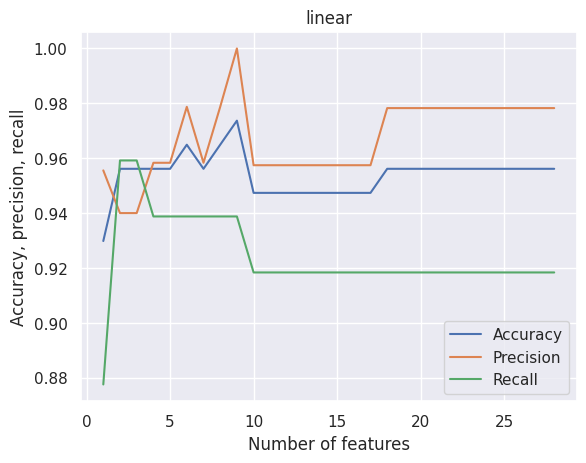


For kernel: poly , at  2  components:
Accuracy:  0.9210526315789473
Recall:  0.8163265306122449
Precision:  1.0


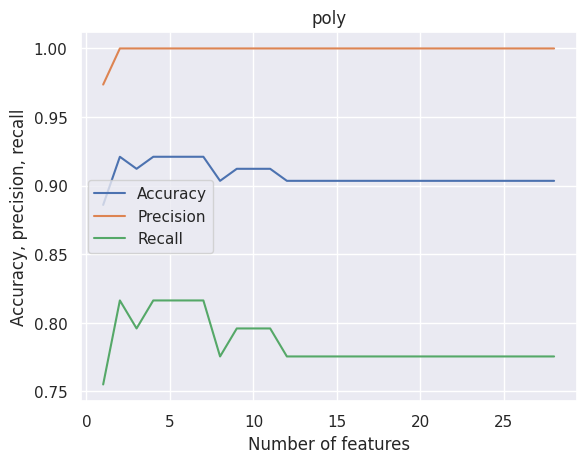


For kernel: rbf , at  9  components:
Accuracy:  0.9649122807017544
Recall:  0.9387755102040817
Precision:  0.9787234042553191


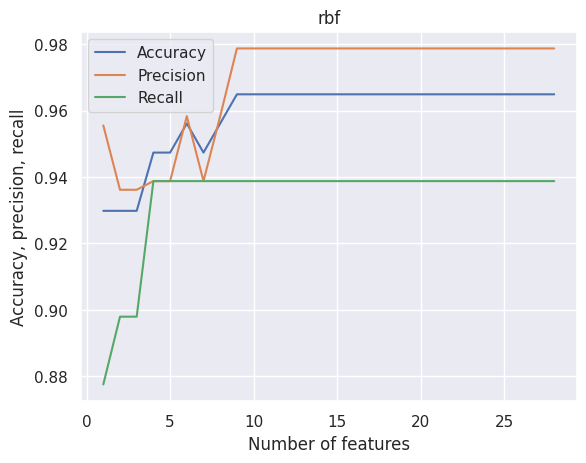


For kernel: sigmoid , at  6  components:
Accuracy:  0.9473684210526315
Recall:  0.9183673469387755
Precision:  0.9574468085106383


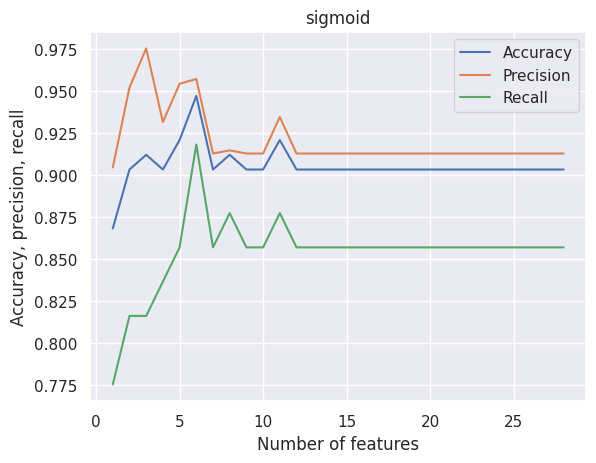

In [36]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
num_features = x_std.shape[1]

for kernel in kernels:  #trying with each kernel
    highest_accuracy = 0
    final_precision = 0
    final_recall = 0
    final_n = 0
    accuracy_array = []
    precision_array = []
    recall_array = []

    for n in range(1,num_features+1): #trying pca with every number of features
        pca = PCA(n_components=n)
        x_train_pca = pca.fit_transform(x_train)
        x_test_pca = pca.transform(x_test)

        #applying the svm classifier over this particular kernel and number of features (will be done for every single one)
        clf = SVC(kernel=kernel)
        clf.fit(x_train_pca, y_train)
        y_clf = clf.predict(x_test_pca)

        #comparing the output values to the ground truth
        accuracy = accuracy_score(y_test, y_clf)
        precision = precision_score(y_test, y_clf)
        recall = recall_score(y_test, y_clf)

        accuracy_array.append(accuracy)
        precision_array.append(precision)
        recall_array.append(recall)


        if accuracy > highest_accuracy:
            highest_accuracy = accuracy
            final_n = n
            final_precision = precision
            final_recall = recall

    print("\nFor kernel:", kernel, ", at ", final_n, " components:")
    print("Accuracy: ", highest_accuracy)
    print("Recall: ", final_recall)
    print("Precision: ", final_precision)


    plt.figure()
    plt.plot(range(1,num_features+1), accuracy_array, label = "Accuracy")
    plt.plot(range(1,num_features+1), precision_array, label = "Precision")
    plt.plot(range(1,num_features+1), recall_array, label = "Recall")
    plt.xlabel('Number of features')
    plt.ylabel("Accuracy, precision, recall")
    plt.title(kernel)
    plt.legend()
    plt.show()

